## Introduction

The King County Housing Data Set contains information about the size, location, condition, and other features of houses in King County. A full description of the dataset's columns can be found below. The aim of this project is to develop a multiple regression model than can predict a house's price as accurately as possible.

### Column Names and descriptions for King County Data Set
* **id** - unique identified for a house
* **date** - Date house was sold
* **price** - Price is prediction target
* **bedrooms** - Number of Bedrooms/House
* **bathrooms** - Number of bathrooms/bedrooms
* **sqft_living** - square footage of the home
* **sqft_lot** - square footage of the lot
* **floors** - Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Previewing the Data

In [1]:
#load necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import markdown
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import datasets, linear_model
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Feature Engineering

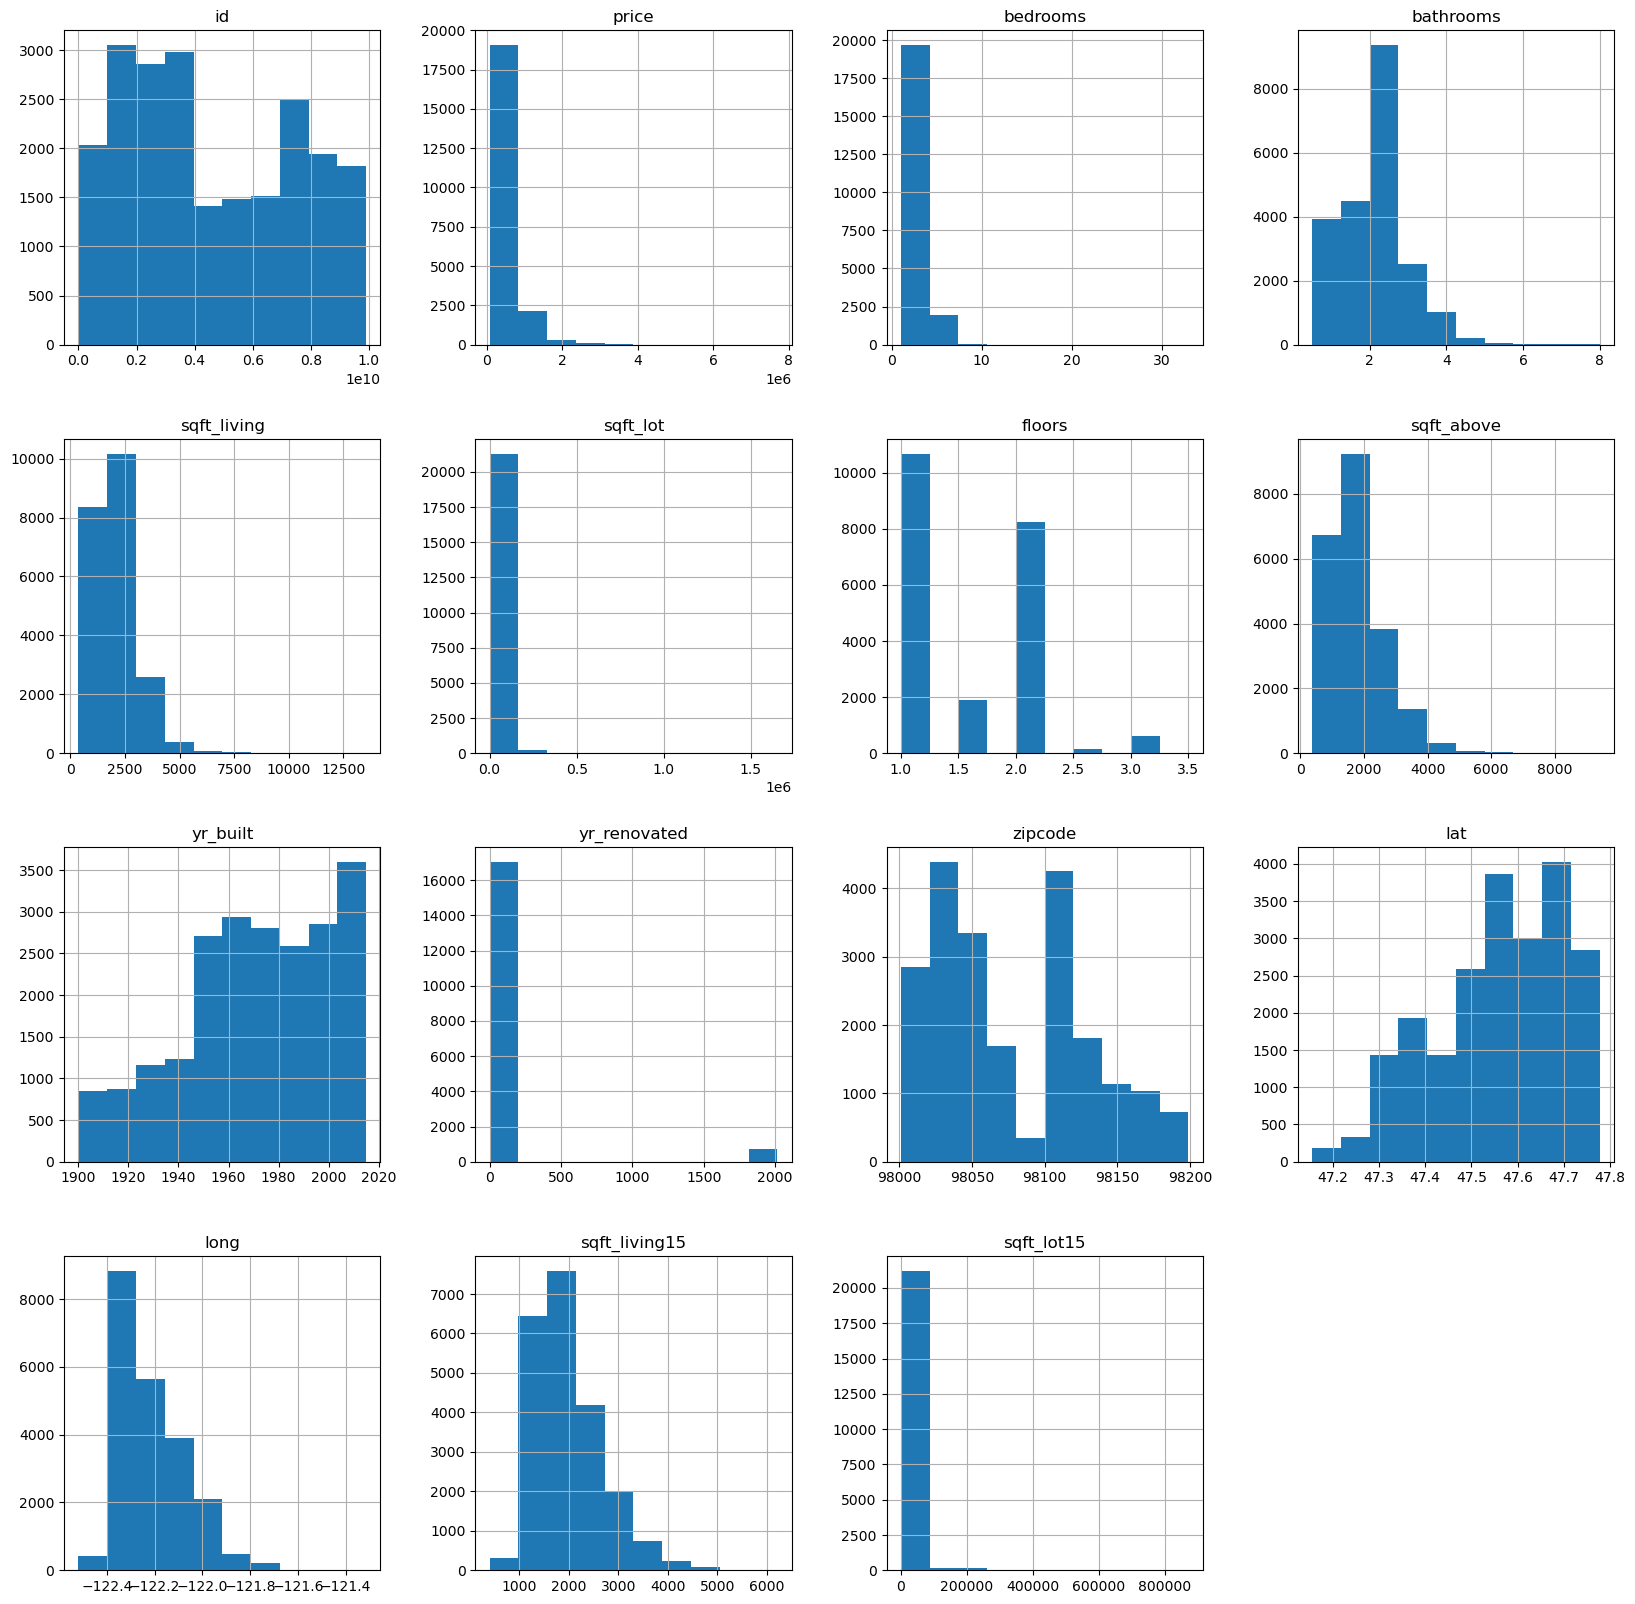

In [4]:
df.hist(figsize=(20,20));

In [5]:
for column in df.columns:
    proportion_of_nas = (sum(df[column].isnull())/len(df[column])) * 100 
    print(column, proportion_of_nas)

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 11.00152798999861
view 0.29170718155299347
condition 0.0
grade 0.0
sqft_above 0.0
sqft_basement 0.0
yr_built 0.0
yr_renovated 17.78950780200954
zipcode 0.0
lat 0.0
long 0.0
sqft_living15 0.0
sqft_lot15 0.0


In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [7]:
#1. Check for counts of unique values in waterfront
df['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [8]:
#2. Fill in the missing values with No and convert to binary

df['waterfront'] = df['waterfront'].fillna('NO')
df['waterfront'] = df['waterfront'].map({'YES': 1, 'NO': 0})

#3. Check if code was responsive

df['waterfront'].value_counts()

waterfront
0    21451
1      146
Name: count, dtype: int64

In [9]:
#4. Check for counts of unique values in view
df['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [10]:
#5. Fill the missing values with None and check if code was responsive

df['view'].fillna("NONE", inplace=True)

df['view'].value_counts()

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [11]:
df['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

In [12]:
df['yr_renovated'].fillna(0, inplace=True)

In [13]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

In [14]:
#3. convert condition and grade into representative numbers
df['view'] = df['view'].map({'NONE': 1,'FAIR': 2,'AVERAGE': 3,'GOOD': 4,'EXCELLENT': 5}).astype(float)
df['condition'] = df['condition'].map({'Poor': 1,'Fair': 2,'Average': 3,'Good': 4,'Very Good': 5}).astype(float)
df['grade'] = df['grade'].map({'3 Poor': 1,'4 Low': 2,'5 Fair': 3,'6 Low Average': 4,'7 Average': 5,'8 Good': 6,'9 Better': 7,'10 Very Good': 8,'11 Excellent': 9,'12 Luxury': 10,'13 Mansion': 11}).astype(float)
df['sqft_basement'] = df['sqft_basement'].replace('?', 0).astype(float)

In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,1.0,...,5.0,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,1.0,...,5.0,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,1.0,...,4.0,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,1.0,...,5.0,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,1.0,...,6.0,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [16]:
# create a new column 'Sale_Number' based on the count of values in 'id' column
Sales_in_df = df['id'].value_counts()
df['Sale_Number'] = df['id'].map(Sales_in_df)

In [17]:
df.shape

(21597, 22)

In [18]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
Sale_Number      0
dtype: int64

In [19]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Sale_Number
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,1.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,1
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,1.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,1.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,1
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,1.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,1.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,1


In [20]:
df.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [21]:
#Create a column for percentage space used

df['Space_use'] = df['sqft_living'] / df['sqft_lot']

df['Space_use'] = df['Space_use'].round(2)

In [22]:
#Fix date column to datetime
df['date'] = pd.to_datetime(df['date'])

#Create a Season column and populate it as Spring, Summer, Fall, Winter
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'
df['season'] = df['date'].dt.month.apply(get_season)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  float64       
 11  grade          21597 non-null  float64       
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

In [24]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Sale_Number,Space_use,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,1.0,...,1955,0.0,98178,47.5112,-122.257,1340,5650,1,0.21,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,1.0,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0.35,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,1.0,...,1933,0.0,98028,47.7379,-122.233,2720,8062,1,0.08,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,1.0,...,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0.39,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,1.0,...,1987,0.0,98074,47.6168,-122.045,1800,7503,1,0.21,Winter


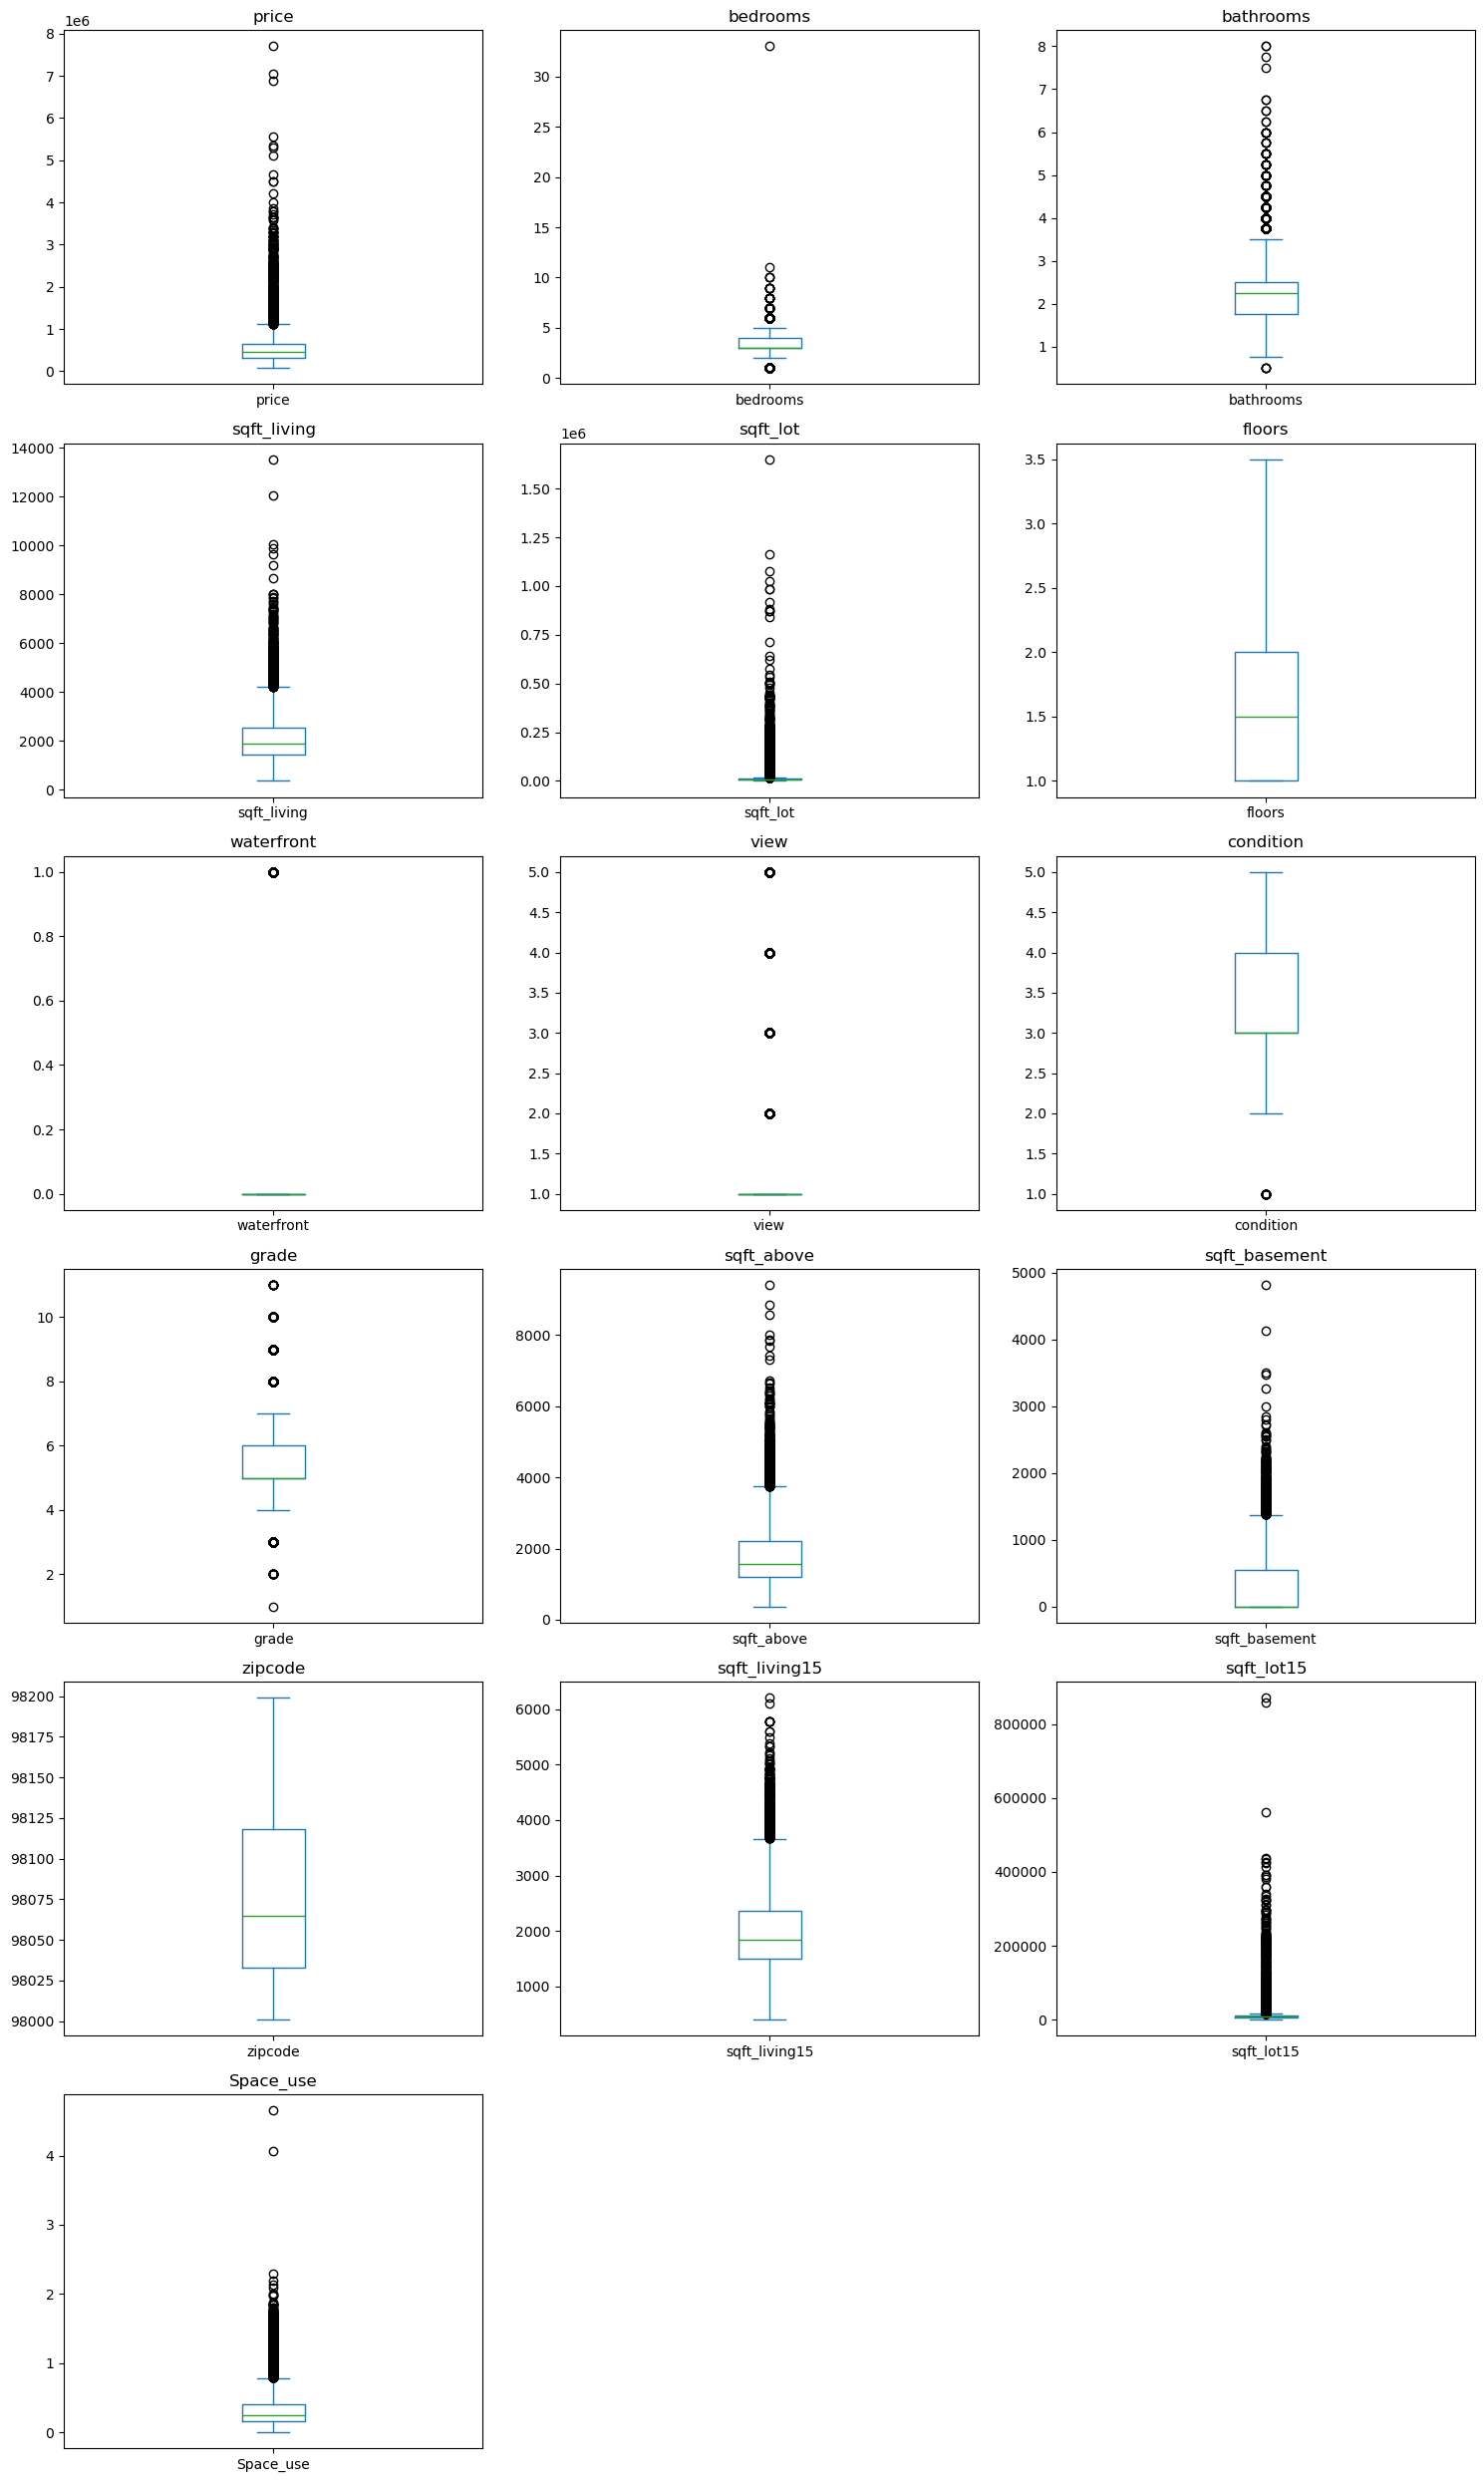

In [25]:
# Create individual boxplots for selected columns
columns_to_plot = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'sqft_living15', 'sqft_lot15', 'Space_use']

# Set the number of boxplots per row
boxplots_per_row = 3

# Calculate the number of rows needed
num_rows = -(-len(columns_to_plot) // boxplots_per_row)  # Ceiling division

# Create a subplot grid
fig, axes = plt.subplots(nrows=num_rows, ncols=boxplots_per_row, figsize=(15, 25))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each boxplot
for i, column in enumerate(columns_to_plot):
    ax = axes[i]
    df[column].plot(kind='box', ax=ax)
    ax.set_title(column)

# Hide any remaining empty subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [26]:
# Count the number of sales for each house and merge with the original DataFrame
sale_counts = df.groupby('id').size().reset_index(name='NumSales')
df = pd.merge(df, sale_counts, on='id', how='left')

# Identify houses sold more than once
houses_sold_more_than_once = df[df['NumSales'] > 1].drop_duplicates('id')

# Generate Markdown report
markdown_report = f"# King County House Sales Report\n\n"
markdown_report += "## Houses Sold More Than Once\n\n"

for house_id, num_sales, total_earnings in houses_sold_more_than_once[['id', 'NumSales', 'price']].to_records(index=False):
    markdown_report += f"House Number {house_id} was sold {num_sales} times in the period under consideration, priced at {total_earnings}.\n"

# Export the Markdown report
with open('king_county_house_sales_report.md', 'w') as file:
    file.write(markdown_report)

# King County House Sales Report

## Houses Sold More Than Once

Find the full report under 'king_county_house_sales_report.md'

House Number 6021501535 was sold 2 times in the period under consideration, priced at 430000.0.\
House Number 4139480200 was sold 2 times in the period under consideration, priced at 1380000.0.\
House Number 7520000520 was sold 2 times in the period under consideration, priced at 232000.0.\
House Number 3969300030 was sold 2 times in the period under consideration, priced at 165000.0.\
House Number 2231500030 was sold 2 times in the period under consideration, priced at 315000.0.

In [27]:
#Rename the 'id' column to 'house_number' and create a new index column named 'id'
df = df.rename(columns={'id': 'house_number'}).reset_index(drop=True)

In [28]:
#Getting a report of number of renovations per year.


# Group by 'yr_renovated' and count the number of unique houses renovated more than once
renovation_counts = df[df['yr_renovated'] > 0].groupby('yr_renovated')['house_number'].nunique().reset_index(name='NumRenovations')

# Sort the renovation report from most renovations to least
renovation_counts = renovation_counts.sort_values(by='NumRenovations', ascending=False)

# Calculate the total number of renovations and the proportion to the number of unique house numbers
total_renovations = renovation_counts['NumRenovations'].sum()
num_unique_houses = df['house_number'].nunique()
proportion_to_unique_houses = total_renovations / num_unique_houses


# Print the total number of renovations and the proportion to the number of unique house numbers
print(f"\nTotal number of renovations: {total_renovations}")
print(f"Proportion to the number of unique house numbers: {proportion_to_unique_houses:.2%}")

# Print messages for the first 3 and last 3 years of renovations
for index, row in renovation_counts.head(3).iterrows():
    message = f"In {row['yr_renovated']}, there were {row['NumRenovations']} renovations."
    print(message)

# Print messages for the last 3 years of renovations
for index, row in renovation_counts.tail(3).iterrows():
    message = f"In {row['yr_renovated']}, there were {row['NumRenovations']} renovations."
    print(message)

# Generate Markdown report
markdown_report = f"# Renovation Report\n\n"
markdown_report += "## Houses Renovated More Than Once\n\n"
markdown_report += renovation_counts.to_markdown(index=False)

# Save the Markdown report to a file
with open('renovation_report.md', 'w') as file:
    file.write(markdown_report)


Total number of renovations: 740
Proportion to the number of unique house numbers: 3.45%
In 2014.0, there were 73.0 renovations.
In 2003.0, there were 31.0 renovations.
In 2013.0, there were 31.0 renovations.
In 1971.0, there were 1.0 renovations.
In 1976.0, there were 1.0 renovations.
In 1934.0, there were 1.0 renovations.


In [29]:
df.describe()

,house_number,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Sale_Number,Space_use,NumSales
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,2014-10-29 04:20:38.171968512,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,1.233181,...,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,1.016484,0.323778,1.016484
min,1.000102e+06,2014-05-02 00:00:00,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000,0.000000,1.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,1.000000,...,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,1.000000,0.160000,1.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,1.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,1.000000,0.250000,1.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,1.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,1.000000,0.410000,1.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,3.000000,4.650000,3.000000
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,...,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,0.128416,0.268507,0.128416


In [30]:
#Export the dataframe

# Specify the path where you want to save the CSV file
csv_file_path = 'export.csv'

# Export the entire DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f'DataFrame exported to {csv_file_path}')

DataFrame exported to export.csv


In [31]:
# Rename the original DataFrame to Original_df
Original_df = df.copy()

# Count the number of sales for each house
sale_counts = df.groupby('house_number').size().reset_index(name='NumSales')

# Add a new column indicating the number of sales for each house
df['NumSales'] = df.groupby('house_number')['house_number'].transform('count')

# Identify houses sold more than once
houses_sold_more_than_once = df[df['NumSales'] > 1]

# Keep the most recent sale for houses sold more than once
houses_sold_more_than_once = houses_sold_more_than_once.sort_values(by=['house_number', 'date'], ascending=[True, False])
houses_sold_more_than_once.drop_duplicates('house_number', keep='first', inplace=True)


# Drop houses sold more than once, keeping the most recent sale
df = pd.concat([df, houses_sold_more_than_once]).drop_duplicates(subset='house_number', keep='last')

# Drop the 'NumSales' column as it is no longer needed
df.drop(columns='NumSales', inplace=True)

# Drop the 'yr_renovated' column
df.drop(columns='yr_renovated', inplace=True)


In [32]:
df.head()

,house_number,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,Sale_Number,Space_use,season
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,1.0,...,0.0,1955,98178,47.5112,-122.257,1340,5650,1,0.21,Fall
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,1.0,...,400.0,1951,98125,47.7210,-122.319,1690,7639,1,0.35,Winter
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,1.0,...,0.0,1933,98028,47.7379,-122.233,2720,8062,1,0.08,Winter
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,1.0,...,910.0,1965,98136,47.5208,-122.393,1360,5000,1,0.39,Winter
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,1.0,...,0.0,1987,98074,47.6168,-122.045,1800,7503,1,0.21,Winter


In [34]:
#Export the dataframe

# Specify the path where you want to save the CSV file
csv_file_path = 'new_export.csv'

# Export the entire DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

print(f'DataFrame exported to {csv_file_path}')

DataFrame exported to new_export.csv
